# Linear Model Selection and Regularization

## Business Understanding

**Sports Analytics**

https://www.transfermarkt.com/

### Initial Setups

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [48]:
#Read data from csv file
data = pd.read_csv('Data\cs_05.csv')
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [49]:
data.shape

(322, 21)

## Data Understanding

#### 1: Understand data collection process

Hitters data set:

Major League Baseball Data from the 1986 and 1987 seasons

#### 2: Document data set description (meta data)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

0 Name: Player's name 

1 AtBat: Number of times at bat in 1986 (numeric)

2 Hits: Number of hits in 1986 (numeric)

3 HmRun: Number of home runs in 1986 (numeric)

4 Runs: Number of runs in 1986 (numeric)

5 RBI: Number of runs batted in in 1986 (numeric)

6 Walks: Number of walks in 1986 (numeric)

7 Years: Number of years in the major leagues (numeric)

8 CAtBat: Number of times at bat during his career (numeric)

9 CHits: Number of hits during his career (numeric)

10 CHmRun: Number of home runs during his career (numeric)

11 CRuns: Number of runs during his career (numeric)

12 CRBI: Number of runs batted in during his career (numeric)

13 CWalks: Number of walks during his career (numeric)

14 League: A factor with levels A and N indicating player's league at the end of 1986 (nominal)

15 Division: A factor with levels E and W indicating player's division at the end of 1986 (nominal)

16 PutOuts: Number of put outs in 1986 (numeric)

17 Assists: Number of assists in 1986 (numeric)

18 Errors: Number of errors in 1986 (numeric)

19 Salary: 1987 annual salary on opening day in thousands of dollars (numeric)

20 NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987 (nominal)

#### 3: Check for missing values

In [51]:
np.sum(data.isnull())

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [52]:
data['is_salary_missed'] = data['Salary'].isnull()
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,is_salary_missed
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,29,14,A,E,446,33,20,NaN,A,True
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,False
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,False
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,False
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.5,N,False


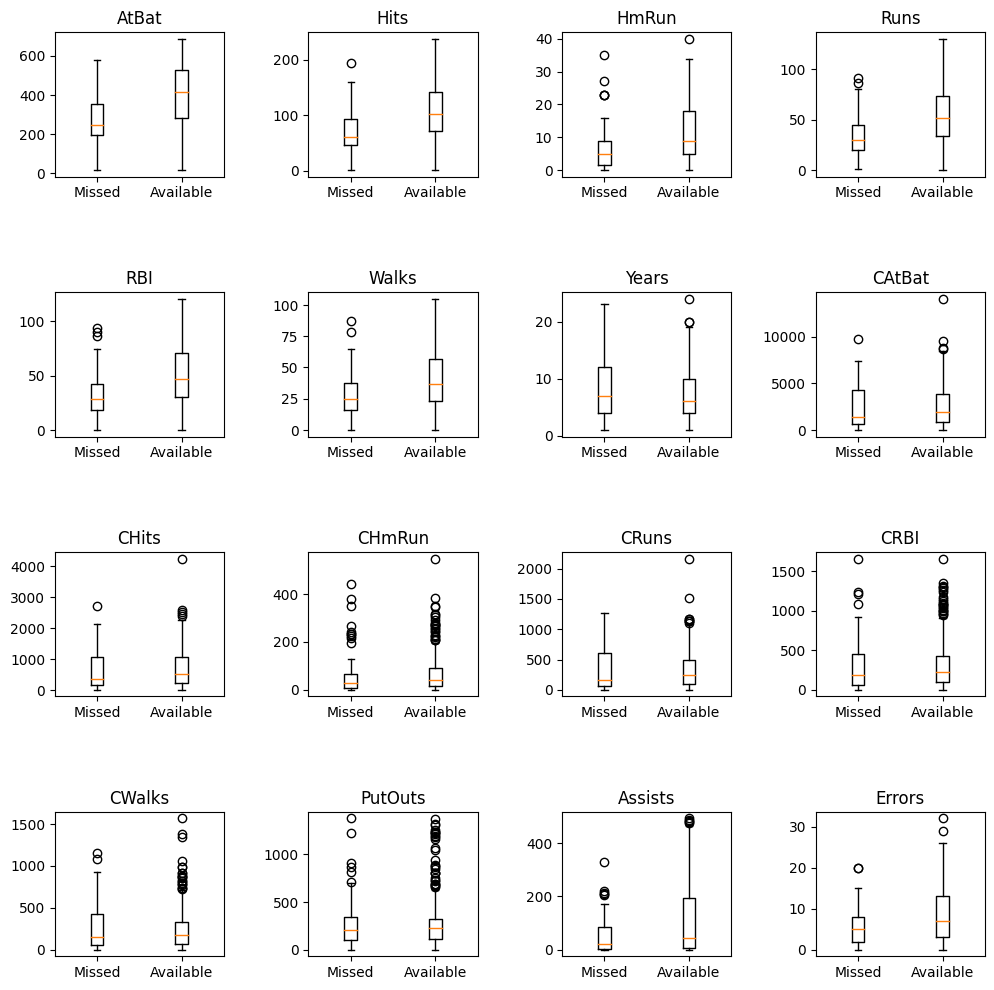

In [53]:
#Analysis of MVs
var_ind = list(range(1, 14)) + list(range(16, 19))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.boxplot([data.loc[data['is_salary_missed'] == True, data.columns[var_ind[i - 1]]],
                 data.loc[data['is_salary_missed'] == False, data.columns[var_ind[i - 1]]]])
    plt.title(data.columns[var_ind[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['Missed', 'Available'])

In [54]:
#MVs analysis from categorical variables perspective
for i in ['League', 'Division', 'NewLeague']:
    cross_tab_pct = round(pd.crosstab(data[i], 
                                      data['is_salary_missed'], 
                                      normalize = 'index'), 2)
    print('--- Cross tab of is_salary_missed vs. ' + i + ' ---')
    print(cross_tab_pct)

--- Cross tab of is_salary_missed vs. League ---
is_salary_missed  False  True 
League                        
A                  0.79   0.21
N                  0.84   0.16
--- Cross tab of is_salary_missed vs. Division ---
is_salary_missed  False  True 
Division                      
E                  0.82   0.18
W                  0.81   0.19
--- Cross tab of is_salary_missed vs. NewLeague ---
is_salary_missed  False  True 
NewLeague                     
A                  0.80   0.20
N                  0.84   0.16


In [55]:
#Remove records with MVs
data.dropna(subset = 'Salary', inplace = True)
np.sum(data.isnull())

Name                0
AtBat               0
Hits                0
HmRun               0
Runs                0
RBI                 0
Walks               0
Years               0
CAtBat              0
CHits               0
CHmRun              0
CRuns               0
CRBI                0
CWalks              0
League              0
Division            0
PutOuts             0
Assists             0
Errors              0
Salary              0
NewLeague           0
is_salary_missed    0
dtype: int64

In [56]:
#Remove is_salary_missed
data.drop(columns = 'is_salary_missed', inplace = True)
data.info()
#Note: sample size is small

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague  263 

#### 4: Univariate data analysis

In [57]:
#Check if there is duplicate rows
np.sum(data.duplicated())

0

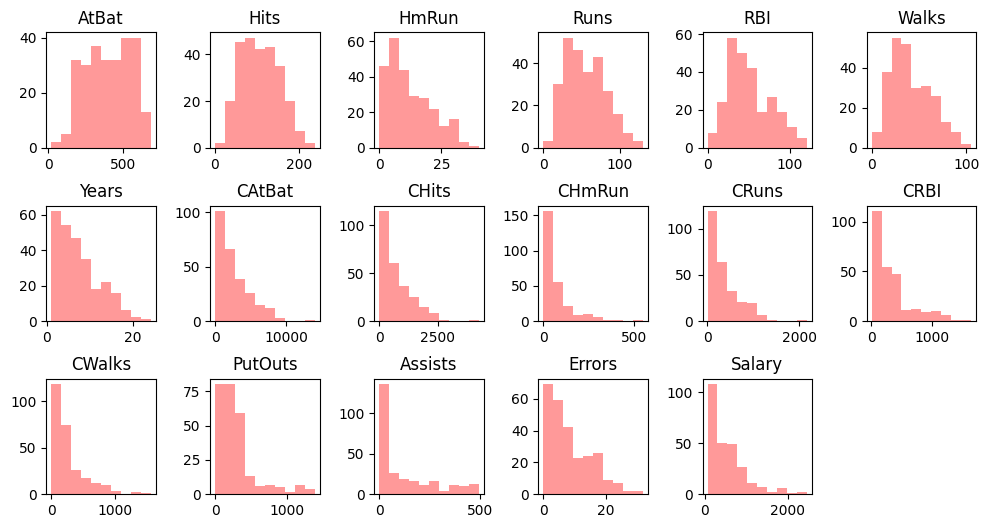

In [58]:
#Histogram of numeric variables
var_ind = list(range(1, 14)) + list(range(16, 20))
plt.figure(figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    plt.subplot(3, 6, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

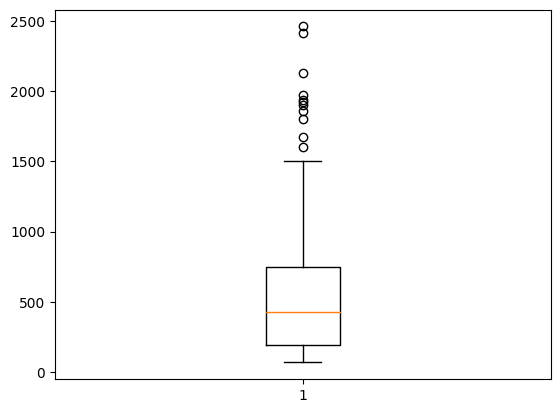

In [59]:
#Check for outliers
plt.boxplot(data['Salary'])
plt.show()

In [60]:
#Categorical variables
for i in ['League', 'Division', 'NewLeague']:
    print('--- Frequency Tabel of ' + i + ' ---')
    print(data[i].value_counts())

--- Frequency Tabel of League ---
League
A    139
N    124
Name: count, dtype: int64
--- Frequency Tabel of Division ---
Division
W    134
E    129
Name: count, dtype: int64
--- Frequency Tabel of NewLeague ---
NewLeague
A    141
N    122
Name: count, dtype: int64


#### 5: Bivariate data analysis

In [61]:
#Correlation analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


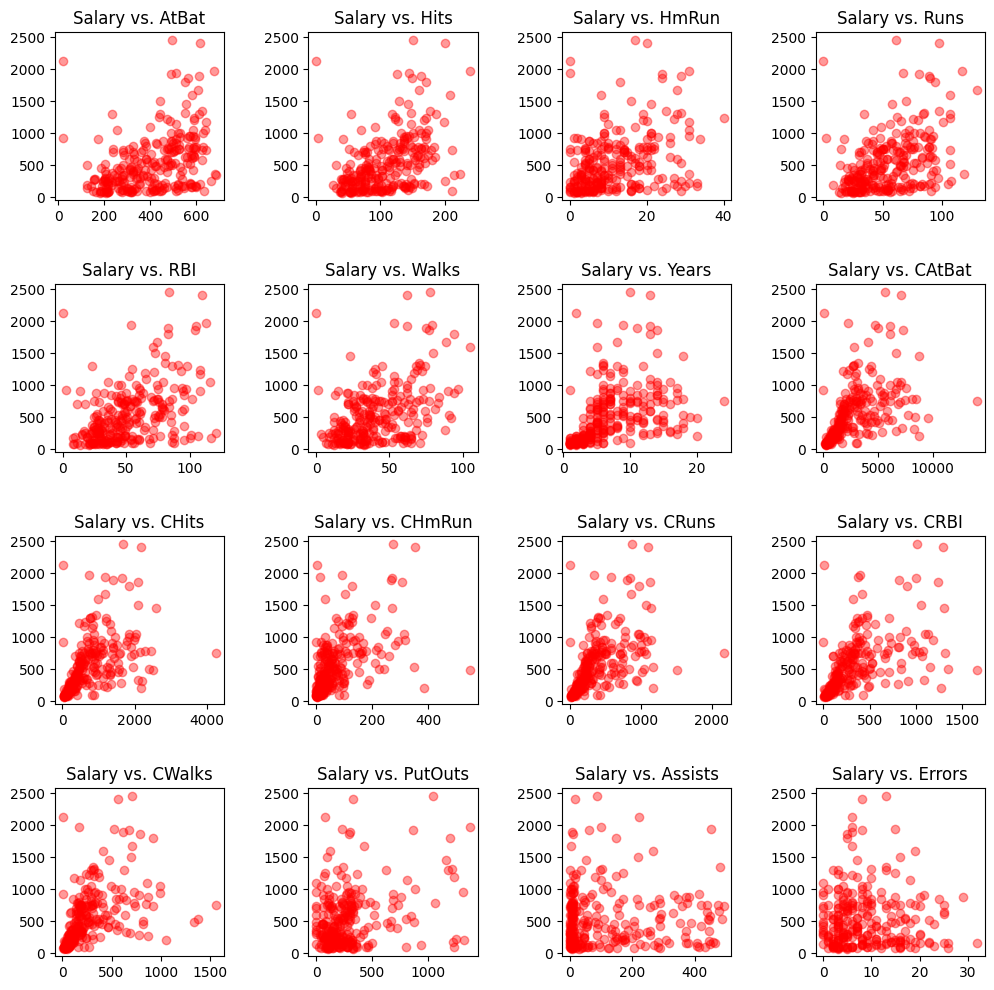

In [62]:
#Scatter plot
var_ind = list(range(1, 14)) + list(range(16, 19))
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.scatter(x = data.iloc[: , var_ind[i - 1]], y = data['Salary'], alpha = 0.4, color = 'red')
    plt.title('Salary vs. ' + data.columns[var_ind[i - 1]])

## Data Preparation

In [63]:
#Remove players' name
data.drop(columns = 'Name', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

## Build Linear Regression Model

In [64]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 1234)
print(train.shape)
print(test.shape)

(210, 20)
(53, 20)


In [65]:
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(train[['League', 'Division', 'NewLeague']], dtype = 'int')
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 98 to 263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     210 non-null    int32
 1   League_N     210 non-null    int32
 2   Division_E   210 non-null    int32
 3   Division_W   210 non-null    int32
 4   NewLeague_A  210 non-null    int32
 5   NewLeague_N  210 non-null    int32
dtypes: int32(6)
memory usage: 6.6 KB


In [66]:
#Define base level for each categorical variable
dummy_vars.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 98 to 263
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_N     210 non-null    int32
 1   Division_W   210 non-null    int32
 2   NewLeague_N  210 non-null    int32
dtypes: int32(3)
memory usage: 4.1 KB


In [67]:
#Define feature matrix 
X_ = train.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_train = pd.concat([X_, dummy_vars], axis = 1)
X_train = sm.add_constant(X_train) #adding a constant
X_train.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [68]:
#Define response matrix
y_train = train['Salary']
y_train

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
        ...  
183     125.0
192     525.0
256     400.0
72      850.0
263     740.0
Name: Salary, Length: 210, dtype: float64

### Classic Linear Regression

In [69]:
#Linear regression - model 1
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.97e-24
Time:                        14:45:21   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#Function to plot histogram of residuals
def hist_residuals(model, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(model.resid)
    xp = np.linspace(model.resid.min(), model.resid.max(), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(model.resid, bins = bins, 
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(model.resid.mean(), color = 'black', 
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()
    
    return plt.show()  

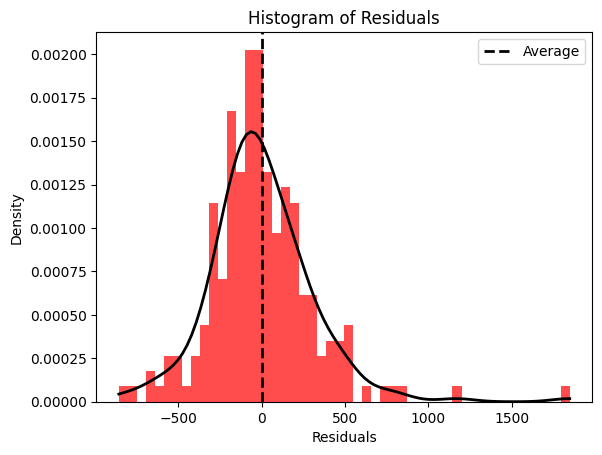

In [71]:
#Histogram of residuals - model 1
hist_residuals(model_1)

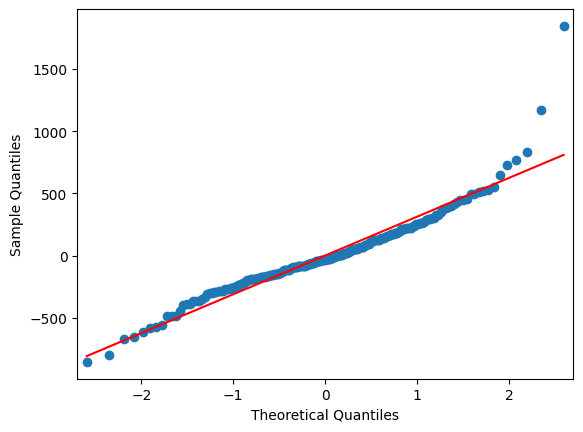

In [72]:
#QQ-plot - model 1
sm.qqplot(model_1.resid, line = 's')
plt.show()

In [73]:
#Function to plot residuals vs. fitted values
def residuals_fittedvalues_plot(model):
    #Implement Lowess algorithm
    lowess_res = sm.nonparametric.lowess(model.resid, model.fittedvalues)

    #Scatter plot: residuals vs. fitted values
    plt.scatter(x = model.fittedvalues, y = model.resid, 
                color = 'red', alpha = 0.7, label = 'data')
    plt.title('Residuals vs. Fitted values')
    plt.xlabel('Fitted Values', fontsize = 12)
    plt.ylabel('Residuals', fontsize = 12)
    plt.grid()

    #Add LOWESS line
    plt.plot(lowess_res[:, 0], lowess_res[:, 1], 'black', 
             alpha = 0.8, linewidth = 2, label = 'LOWESS')
    plt.legend()

    #Top three observations with greates absolute value of the residual
    top3 = abs(model.resid).sort_values(ascending = False)[:3]
    for i in top3.index:
        plt.annotate(i, xy = (model.fittedvalues[i], model.resid[i]), color = 'blue')
    
    return plt.show()

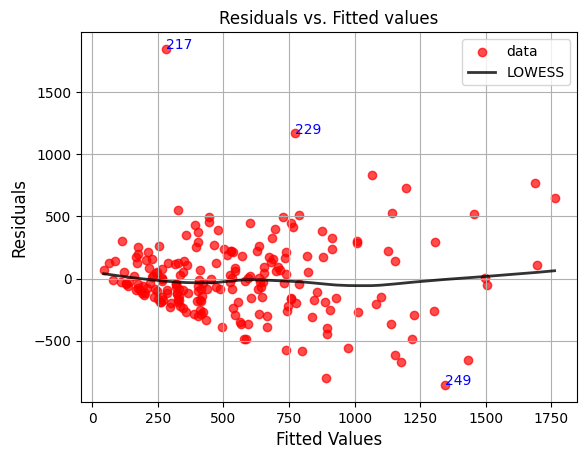

In [74]:
#Scatter plot of residuals vs. fitted values - model 1
residuals_fittedvalues_plot(model_1)

In [75]:
#Function to check Cook's distance
def influencer_detector(model, thershold = 1):
    
    #create instance of influence
    influence = model.get_influence()

    #Obtain Cook's distance for each observation
    cooks = influence.cooks_distance

    #Check observations w/ Cook's distance greater than thershold
    return np.where(cooks[0] > 1)

In [76]:
#Check Cook's ditance - model 1
influencer_detector(model_1)

(array([], dtype=int64),)

In [77]:
#Function to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return(vif)

In [78]:
#Check multicollinearity for numeric variables
calc_vif(X_train.iloc[:, 1 : 17])
#Note: If VIF > 10 then multicollinearity is high

,variables,VIF
0,AtBat,175.805279
1,Hits,221.940940
2,HmRun,23.459205
3,Runs,92.043436
4,RBI,64.404628
5,Walks,21.080653
6,Years,18.645147
7,CAtBat,652.546665
8,CHits,1317.259549
9,CHmRun,92.171587


**Conclusion:**

Severe violation of regression assumptions

If select variables based on t-test results, limited number of variables will be selected.

Bad model!

t-test results are not reliable for predictors selection.

In [79]:
#Regression Model based on t-test results
model_1 = sm.OLS(y_train, X_train[['const', 
                                   'AtBat', 
                                   'Hits',
                                   'Walks',
                                   'PutOuts',
                                   'Division_W']]).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     20.05
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           3.00e-16
Time:                        14:45:22   Log-Likelihood:                -1546.2
No. Observations:                 210   AIC:                             3104.
Df Residuals:                     204   BIC:                             3124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.4321     87.896      1.985      0.049       1.131     347.733
AtBat         -1.6859      0.702     -2.400      0.017      -3.071      -0.301
Hits           7.3574      2.169      3.391      0.001       3.080      11.635
Walks          6.4162      1.569      4.089      0.000       3.322       9.510
PutOuts        0.2851      0.104      2.751      0.006       0.081       0.489
Division_W  -158.5226     54.000     -2.936      0.004    -264.993     -52.052
==============================================================================
Omnibus:                       61.603   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.411
Skew:                           1.249   Prob(JB):                     3.64e-38
Kurtosis:                       6.670   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
#Predict on test - model 1

#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(test[['League', 'Division', 'NewLeague']])
dummy_vars.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'], inplace = True)

#Define feature matrix 
X_ = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_, dummy_vars], axis = 1)
X_test = sm.add_constant(X_test) #adding a constant

#Prediction using model 1
pred_lm = model_1.predict(X_test[['const', 
                                  'AtBat', 
                                  'Hits',
                                  'Walks',
                                  'PutOuts',
                                  'Division_W']])

pred_lm

295      217.02006
132      177.72987
137     670.775776
268     528.768809
239     383.391247
128     716.168806
189    1073.688878
209     671.234453
276      487.70406
236     340.528194
227      679.59532
320    1142.959361
215     583.451817
178     703.872157
121     272.338217
265     370.596159
45      490.019938
274    1085.730981
40       475.61316
244      726.89584
198     416.207682
303     637.049049
7       130.003657
78      421.702049
96      888.075743
68      660.047802
223     243.643909
35      369.839295
93      605.869988
130     617.183627
311     449.314604
6       291.167457
131     413.984573
63      203.659997
205     413.301856
89      460.611353
293     838.131558
314     675.590678
8       159.403146
10      822.945647
88      244.443338
85      509.900384
124     366.701523
185     719.569029
262     654.097839
43      292.300453
162     221.985733
214     241.790869
301     471.355072
70        297.9772
226     253.076502
271     991.794707
195      622

In [81]:
#Absolute error
abs_err_lm = abs(test['Salary'] - pred_lm)

#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
models_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_lm.mean(),
                            'Median of AbsErrors' : abs_err_lm.median(),
                            'SD of AbsErrors' :     abs_err_lm.std(),
                            'IQR of AbsErrors':     iqr(abs_err_lm),
                            'Min of AbsErrors':     abs_err_lm.min(),
                            'Max of AbsErrors':     abs_err_lm.max()}, 
                           index = ['LM_t-Test'])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-Test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257


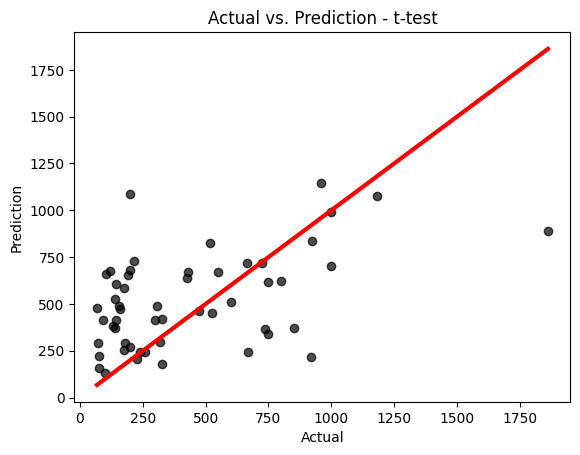

In [82]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_lm, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - t-test')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [83]:
#Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method = 'box-cox')
boxcox.fit(y_train.values.reshape(-1, 1))
trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))

In [84]:
model_1 = sm.OLS(trans_y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     13.41
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           6.24e-26
Time:                        14:45:22   Log-Likelihood:                -208.67
No. Observations:                 210   AIC:                             457.3
Df Residuals:                     190   BIC:                             524.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4535      0.225     -6.463      0.000      -1.897      -1.010
AtBat          -0.0027      0.002     -1.744      0.083      -0.006       0.000
Hits            0.0146      0.006      2.412      0.017       0.003       0.026
HmRun           0.0217      0.016      1.362      0.175      -0.010       0.053
Runs           -0.0056      0.008     -0.745      0.457      -0.020       0.009
RBI            -0.0043      0.007     -0.640      0.523      -0.017       0.009
Walks           0.0114      0.005      2.411      0.017       0.002       0.021
Years           0.0485      0.030      1.639      0.103      -0.010       0.107
CAtBat      -7.988e-06      0.000     -0.022      0.982      -0.001       0.001
CHits          -0.0001      0.002     -0.066      0.947      -0.004       0.004
CHmRun         -0.0010      0.004     -0.238      0.812      -0.009       0.007
CRuns           0.0023      0.002      1.214      0.226      -0.001       0.006
CRBI            0.0002      0.002      0.125      0.900      -0.004       0.004
CWalks         -0.0013      0.001     -1.549      0.123      -0.003       0.000
PutOuts         0.0003      0.000      1.723      0.086   -4.92e-05       0.001
Assists         0.0005      0.001      0.926      0.356      -0.001       0.002
Errors         -0.0044      0.011     -0.407      0.684      -0.026       0.017
League_N        0.1813      0.205      0.883      0.378      -0.223       0.586
Division_W     -0.2389      0.100     -2.378      0.018      -0.437      -0.041
NewLeague_N    -0.0606      0.207     -0.293      0.770      -0.469       0.347
==============================================================================
Omnibus:                       17.248   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.527
Skew:                           0.239   Prob(JB):                     4.78e-11
Kurtosis:                       5.281   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

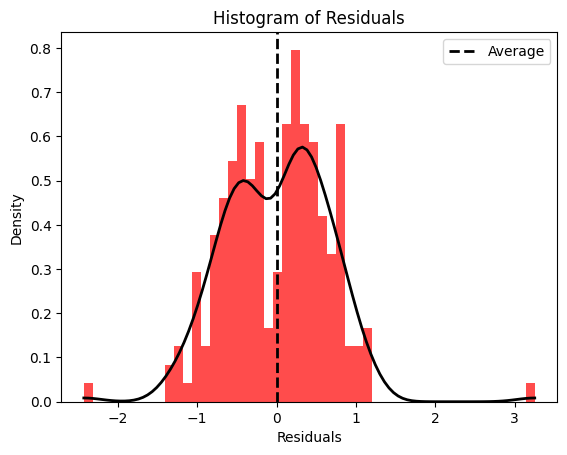

In [85]:
#Histogram of residuals - model 1
hist_residuals(model_1)

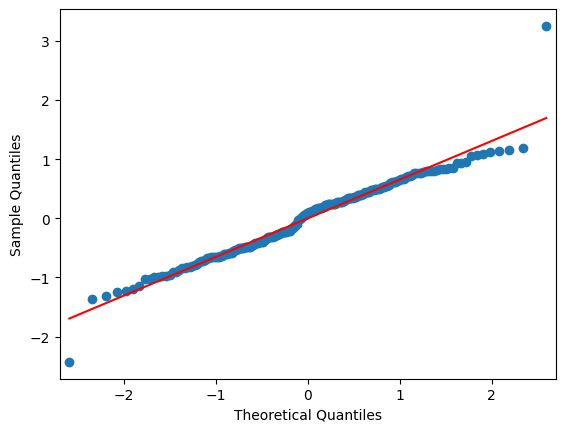

In [86]:
#QQ-plot - model 1
sm.qqplot(model_1.resid, line = 's')
plt.show()

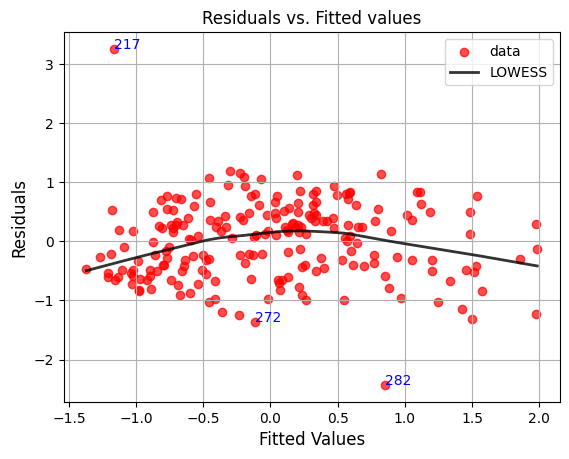

In [87]:
#Scatter plot of residuals vs. fitted values - model 1
residuals_fittedvalues_plot(model_1)

### Forward Selection

In [88]:
#Define function to fit linear regression
def fit_lm(feature_set, y, X):
    reg_model = sm.OLS(y, X[['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 
            'r2': reg_model.rsquared,
            'adj_r2': reg_model.rsquared_adj,
            'aic': reg_model.aic,
            'bic': reg_model.bic}

In [89]:
#Define function to do forward selection
def fwd_selection(features, y, X):
    res = []
    #Pull out features still needed to process
    remaining_features = [_ for _ in X.iloc[:, 1:].columns if _ not in features]
          
    #Fit linear model and save the results
    for f in remaining_features:
        res.append(fit_lm(features + [f], y, X))
   
    models = pd.DataFrame(res)
    
    #Choose the model with the highest R squared
    best_model = models.iloc[models['r2'].argmax()] 
    
    #Return the best model
    return best_model

In [90]:
#Forward selection implementation
import time #to measure the processing time
fwd_models = pd.DataFrame(columns = ['model', 'r2', 'adj_r2', 'aic', 'bic'])
start_time = time.time()
features = []
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    fwd_models.loc[i] = fwd_selection(features, trans_y_train, X_train)
    features = fwd_models.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.18650102615356445 seconds


In [45]:
fwd_models

,model,r2,adj_r2,aic,bic
1,<statsmodels.regression.linear_model.Regressio...,0.427002,0.424248,483.010724,489.704939
2,<statsmodels.regression.linear_model.Regressio...,0.517066,0.5124,449.100166,459.141488
3,<statsmodels.regression.linear_model.Regressio...,0.527929,0.521054,446.322924,459.711354
4,<statsmodels.regression.linear_model.Regressio...,0.537439,0.528413,444.049074,460.784612
5,<statsmodels.regression.linear_model.Regressio...,0.544135,0.532962,442.98689,463.069535
6,<statsmodels.regression.linear_model.Regressio...,0.549387,0.536069,442.553216,465.982969
7,<statsmodels.regression.linear_model.Regressio...,0.55312,0.537634,442.806363,469.583223
8,<statsmodels.regression.linear_model.Regressio...,0.558907,0.541351,442.069086,472.193054
9,<statsmodels.regression.linear_model.Regressio...,0.565132,0.545563,441.084379,474.555454
10,<statsmodels.regression.linear_model.Regressio...,0.567407,0.545669,441.982954,478.801137


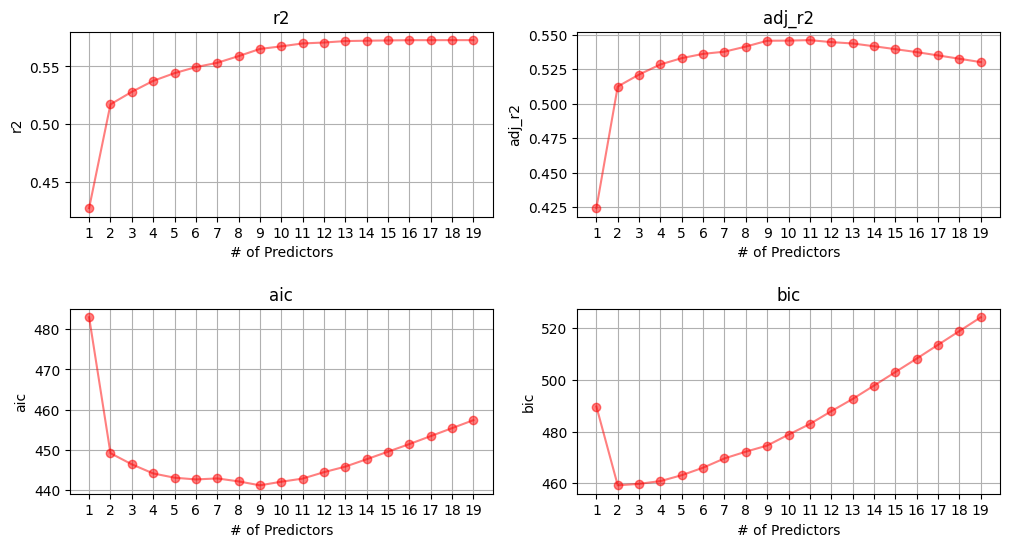

In [46]:
#Models evaluation
plt.figure(figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.plot(fwd_models.iloc[:, i], 'r-o', alpha = 0.5)
    plt.title(fwd_models.columns[i])
    plt.xlabel('# of Predictors')
    plt.xticks(range(1, 20))
    plt.ylabel(fwd_models.columns[i])
    plt.grid()    

In [47]:
#Liner model with 11 Variables (based on adjusted r2)
fwd_models.loc[11, 'model'].params

const        -1.471775
CRuns         0.001863
Hits          0.012291
Division_W   -0.223086
PutOuts       0.000349
Years         0.050675
League_N      0.135614
AtBat        -0.003009
Walks         0.009534
CWalks       -0.001199
HmRun         0.010251
Assists       0.000421
dtype: float64

In [48]:
#Selected features 
fwd_models.loc[11, 'model'].model.exog_names

['const',
 'CRuns',
 'Hits',
 'Division_W',
 'PutOuts',
 'Years',
 'League_N',
 'AtBat',
 'Walks',
 'CWalks',
 'HmRun',
 'Assists']

In [49]:
#Predict on test - model 2
pred_fwd = fwd_models.loc[11, 'model'].predict(X_test[fwd_models.loc[11, 'model'].model.exog_names])
pred_fwd = pd.Series(boxcox.inverse_transform(pred_fwd.values.reshape(-1, 1)).reshape(-1), index = test.index)
pred_fwd

295     131.231639
132     614.693739
137     784.741065
268     267.614593
239     224.344941
128     460.399661
189     807.448441
209     390.409518
276     299.893241
236    2334.747925
227     310.525799
320     817.820135
215     330.755521
178    1201.735553
121     886.197911
265     221.619530
45      226.976398
274     564.858101
40      168.215470
244     350.029515
198     216.604194
303     339.158323
7       127.347257
78      293.919203
96     1507.588995
68      341.181440
223     206.154878
35      758.854540
93      288.523291
130     517.903433
311     330.824498
6       161.290364
131     267.966467
63      170.618469
205     204.620260
89      271.642003
293     631.363396
314     286.384907
8       152.591110
10      976.844892
88      378.147455
85      357.890164
124     687.794615
185     559.780214
262     321.190114
43      171.133532
162     127.516557
214     259.258925
301     261.686458
70      769.195999
226     177.049241
271    1648.578809
195     656.

In [50]:
#Absolute error
abs_err_fwd = abs(test['Salary'] - pred_fwd)

#Absolute error mean, median, sd, IQR, max, min
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'Mean of AbsErrors':    abs_err_fwd.mean(),
                                       'Median of AbsErrors' : abs_err_fwd.median(),
                                       'SD of AbsErrors' :     abs_err_fwd.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_fwd),
                                       'Min of AbsErrors':     abs_err_fwd.min(),
                                       'Max of AbsErrors':     abs_err_fwd.max()}, 
                                      index = ['LM_FWD'])])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-Test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
LM_FWD,220.621618,143.523291,256.415035,156.268159,2.049241,1584.747925


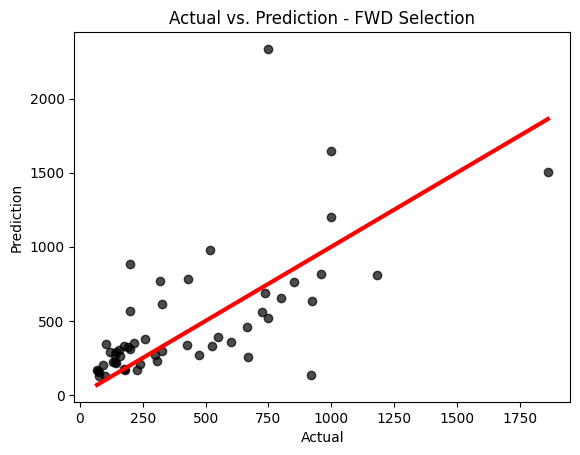

In [51]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_fwd, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - FWD Selection')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### Backward Elimination

In [52]:
#Get all possible combinations - C(n, r)
features = ['CHits', 'Walks', 'HmRun']
import itertools
for i in itertools.combinations(features, len(features) - 1):
    print(i)   

('CHits', 'Walks')
('CHits', 'HmRun')
('Walks', 'HmRun')


In [53]:
#Define function to do backward elimination
def bwd_elimination(features, y, X):
    res = []
    
    #Fit linear model and save the results
    for f in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(f, y, X))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the highest R squared
    best_model = models.iloc[models['r2'].argmax()] 
          
    #Return the best model
    return best_model

In [54]:
#Backward elimination implementation
bwd_models = pd.DataFrame(columns = ['model', 'r2', 'adj_r2', 'aic', 'bic'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):  
    bwd_models.loc[len(features) - 1] = bwd_elimination(features, trans_y_train, X_train)
    features = bwd_models.loc[len(features) - 1]['model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.23041462898254395 seconds


In [55]:
bwd_models

,model,r2,adj_r2,aic,bic
19,<statsmodels.regression.linear_model.Regressio...,0.5728,0.53008,457.348572,524.290723
18,<statsmodels.regression.linear_model.Regressio...,0.572799,0.532539,455.349114,518.944157
17,<statsmodels.regression.linear_model.Regressio...,0.572758,0.534929,453.369166,513.617102
16,<statsmodels.regression.linear_model.Regressio...,0.572753,0.537334,451.371435,508.272263
15,<statsmodels.regression.linear_model.Regressio...,0.572529,0.539477,449.481958,503.035678
14,<statsmodels.regression.linear_model.Regressio...,0.572294,0.541586,447.597358,497.80397
13,<statsmodels.regression.linear_model.Regressio...,0.571978,0.543589,445.752116,492.611622
12,<statsmodels.regression.linear_model.Regressio...,0.570722,0.544573,444.36761,487.880008
11,<statsmodels.regression.linear_model.Regressio...,0.569914,0.54602,442.762564,482.927855
10,<statsmodels.regression.linear_model.Regressio...,0.567407,0.545669,441.982954,478.801137


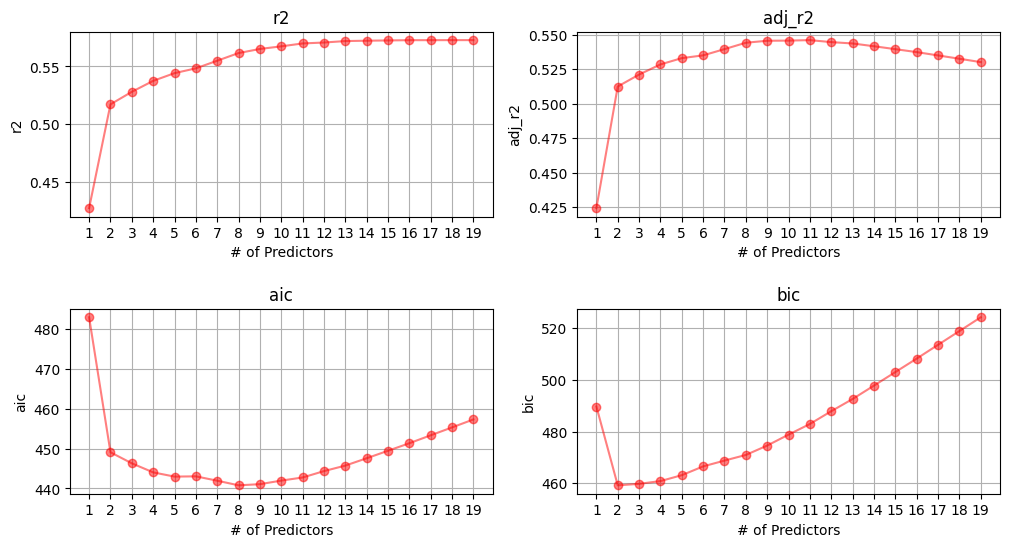

In [56]:
#Models evaluation
plt.figure(figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.plot(bwd_models.iloc[:, i], 'r-o', alpha = 0.5)
    plt.title(bwd_models.columns[i])
    plt.xlabel('# of Predictors')
    plt.xticks(range(1, 20))
    plt.ylabel(bwd_models.columns[i])
    plt.grid()
#Select the best model and predict on test (do it yourself)

In [57]:
#Liner model with 8 Variables (based on aic)
bwd_models.loc[8, 'model'].params

const        -1.426798
AtBat        -0.002476
Hits          0.011800
Walks         0.009689
Years         0.050614
CRuns         0.001843
CWalks       -0.001140
PutOuts       0.000373
Division_W   -0.221029
dtype: float64

In [58]:
#Selected features 
bwd_models.loc[8, 'model'].model.exog_names

['const',
 'AtBat',
 'Hits',
 'Walks',
 'Years',
 'CRuns',
 'CWalks',
 'PutOuts',
 'Division_W']

In [59]:
#Predict on test - model 3
pred_bwd = bwd_models.loc[8, 'model'].predict(X_test[bwd_models.loc[8, 'model'].model.exog_names])
pred_bwd = pd.Series(boxcox.inverse_transform(pred_bwd.values.reshape(-1, 1)).reshape(-1), index = test.index)
pred_bwd

295     117.891209
132     673.494247
137     856.927689
268     239.941490
239     210.385152
128     459.512380
189     756.851508
209     405.484961
276     246.606137
236    2434.495251
227     342.297348
320     946.649897
215     292.015150
178    1237.256001
121     800.911657
265     196.715645
45      256.648757
274     531.857368
40      188.148631
244     325.860583
198     216.563708
303     362.933866
7       134.704258
78      310.846001
96     1582.775121
68      328.558675
223     199.177406
35      705.726642
93      290.641464
130     434.595060
311     304.694363
6       150.658936
131     232.977653
63      160.065766
205     181.357864
89      260.629919
293     618.886397
314     275.116904
8       133.024831
10      903.486192
88      387.159663
85      400.912493
124     666.580766
185     552.092232
262     318.622746
43      182.341462
162     140.989714
214     227.980153
301     260.224139
70      734.176752
226     188.634703
271    1870.015750
195     633.

In [60]:
#Absolute error
abs_err_bwd = abs(test['Salary'] - pred_bwd)

#Absolute error mean, median, sd, IQR, max, min
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'Mean of AbsErrors':    abs_err_bwd.mean(),
                                       'Median of AbsErrors' : abs_err_bwd.median(),
                                       'SD of AbsErrors' :     abs_err_bwd.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_bwd),
                                       'Min of AbsErrors':     abs_err_bwd.min(),
                                       'Max of AbsErrors':     abs_err_bwd.max()}, 
                                      index = ['LM_BWD'])])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-Test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
LM_FWD,220.621618,143.523291,256.415035,156.268159,2.049241,1584.747925
LM_BWD,223.247003,142.297348,275.554457,207.765645,2.341462,1684.495251


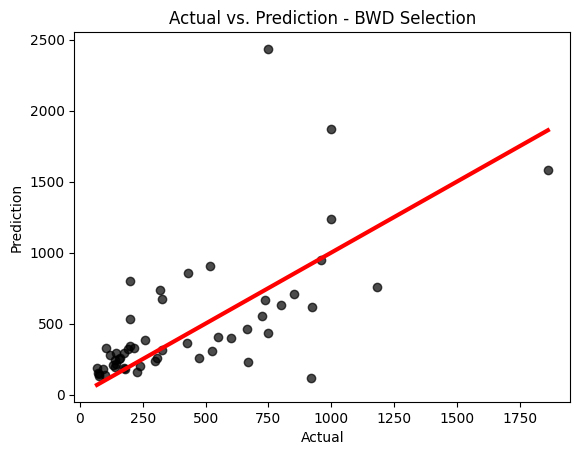

In [61]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_bwd, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - BWD Selection')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### Ridge Regression

In [62]:
#Scale data before implementing Ridge regression
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_scaled

array([[ 0.        ,  0.04054613,  0.11025688, ...,  1.07932778,
         0.95346259,  1.11087468],
       [ 0.        , -0.01360133, -0.36759188, ...,  1.07932778,
         0.95346259,  1.11087468],
       [ 0.        , -0.04067506, -0.1938287 , ..., -0.92650261,
        -1.04880885, -0.90019155],
       ...,
       [ 0.        , -1.38082469, -1.25812821, ..., -0.92650261,
        -1.04880885, -0.90019155],
       [ 0.        ,  0.69708409,  0.45778325, ..., -0.92650261,
         0.95346259, -0.90019155],
       [ 0.        ,  1.47545382,  1.47864197, ...,  1.07932778,
        -1.04880885,  1.11087468]])

In [63]:
#Implement Ridge regression - model 4
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1) #lambda = 0.1 (regularization hyperparameter)
model_4 = ridge_reg.fit(X_train_scaled, trans_y_train)

In [64]:
model_4.coef_

array([[ 0.        , -0.39130772,  0.64501823,  0.18366801, -0.12888215,
        -0.10498504,  0.24326235,  0.22177787, -0.05252352,  0.02971953,
        -0.05694298,  0.6279745 ,  0.03137771, -0.31625719,  0.09327704,
         0.06924016, -0.02869884,  0.09232827, -0.11900437, -0.03220465]])

In [65]:
#Grid
lambda_grid = 10 ** np.linspace(3, -3, 100)
lambda_grid

array([1.00000000e+03, 8.69749003e+02, 7.56463328e+02, 6.57933225e+02,
       5.72236766e+02, 4.97702356e+02, 4.32876128e+02, 3.76493581e+02,
       3.27454916e+02, 2.84803587e+02, 2.47707636e+02, 2.15443469e+02,
       1.87381742e+02, 1.62975083e+02, 1.41747416e+02, 1.23284674e+02,
       1.07226722e+02, 9.32603347e+01, 8.11130831e+01, 7.05480231e+01,
       6.13590727e+01, 5.33669923e+01, 4.64158883e+01, 4.03701726e+01,
       3.51119173e+01, 3.05385551e+01, 2.65608778e+01, 2.31012970e+01,
       2.00923300e+01, 1.74752840e+01, 1.51991108e+01, 1.32194115e+01,
       1.14975700e+01, 1.00000000e+01, 8.69749003e+00, 7.56463328e+00,
       6.57933225e+00, 5.72236766e+00, 4.97702356e+00, 4.32876128e+00,
       3.76493581e+00, 3.27454916e+00, 2.84803587e+00, 2.47707636e+00,
       2.15443469e+00, 1.87381742e+00, 1.62975083e+00, 1.41747416e+00,
       1.23284674e+00, 1.07226722e+00, 9.32603347e-01, 8.11130831e-01,
       7.05480231e-01, 6.13590727e-01, 5.33669923e-01, 4.64158883e-01,
      

In [66]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(lambda_grid)) #to save cv results

for i in range(len(lambda_grid)):
    ridge_reg = Ridge(alpha = lambda_grid[i])
    scores = cross_val_score(estimator = ridge_reg, 
                             X = X_train_scaled, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

cv_errors

array([-0.77491332, -0.76486713, -0.75562639, -0.74723168, -0.73969433,
       -0.7329998 , -0.72711248, -0.72198119, -0.71754468, -0.71373661,
       -0.71048958, -0.70773826, -0.70542139, -0.70348294, -0.70187255,
       -0.70054553, -0.69946243, -0.69858854, -0.69789332, -0.69734983,
       -0.69693424, -0.69662551, -0.69640502, -0.69625644, -0.69616552,
       -0.69612   , -0.69610955, -0.69612567, -0.69616165, -0.69621245,
       -0.69627464, -0.69634626, -0.69642672, -0.69651654, -0.69661725,
       -0.69673109, -0.69686076, -0.69700915, -0.69717907, -0.69737295,
       -0.69759262, -0.69783912, -0.69811254, -0.69841201, -0.69873566,
       -0.69908075, -0.69944377, -0.69982066, -0.70020697, -0.70059814,
       -0.70098965, -0.70137719, -0.70175687, -0.70212526, -0.70247948,
       -0.70281726, -0.70313689, -0.70343726, -0.70371775, -0.70397817,
       -0.70421875, -0.70444001, -0.70464268, -0.70482768, -0.70499603,
       -0.7051488 , -0.70528708, -0.70541194, -0.70552445, -0.70

In [67]:
#Best lambda
best_lamda = lambda_grid[np.argmax(cv_errors)]
best_lamda

26.560877829466868

In [68]:
#Best model coefs:
ridge_reg = Ridge(alpha = best_lamda)
model_4 = ridge_reg.fit(X_train_scaled, trans_y_train)
model_4.coef_

array([[ 0.        , -0.0141723 ,  0.17519056,  0.03823099,  0.06670085,
         0.0227881 ,  0.08917691,  0.13566175,  0.09327125,  0.14520349,
        -0.01130061,  0.13114115,  0.05157239, -0.02501404,  0.07863884,
         0.04537909, -0.03173266,  0.06770653, -0.10581254, -0.0094946 ]])

In [69]:
#Predict on test - model 4
#Sacle test data set
X_test_scaled = StandardScaler().fit_transform(X_test)
pred_ridge = model_4.predict(X_test_scaled)
pred_ridge = pd.Series(boxcox.inverse_transform(pred_ridge).reshape(-1), index = test.index)
pred_ridge

295     132.996330
132     561.520216
137     579.031486
268     359.672932
239     266.316143
128     599.048328
189     811.787057
209     433.047891
276     417.494713
236    1517.616923
227     416.259727
320     848.101412
215     413.566228
178     931.003690
121     844.879823
265     231.795659
45      258.367791
274     612.653308
40      191.200926
244     425.641037
198     271.946275
303     380.598018
7       171.768534
78      332.939041
96     1373.770514
68      407.850372
223     244.987253
35      636.004573
93      360.447083
130     469.134741
311     407.066090
6       196.956519
131     268.281500
63      195.292641
205     227.093313
89      334.091240
293     708.394179
314     332.518457
8       193.662665
10      942.728926
88      397.130681
85      413.734491
124     614.323434
185     598.036792
262     340.895219
43      212.730311
162     143.181730
214     305.652490
301     409.640689
70      725.015697
226     276.016346
271    1180.109008
195     570.

In [70]:
#Absolute error
abs_err_ridge = abs(test['Salary'] - pred_ridge)

#Absolute error mean, median, sd, IQR, max, min
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'Mean of AbsErrors':    abs_err_ridge.mean(),
                                       'Median of AbsErrors' : abs_err_ridge.median(),
                                       'SD of AbsErrors' :     abs_err_ridge.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_ridge),
                                       'Min of AbsErrors':     abs_err_ridge.min(),
                                       'Max of AbsErrors':     abs_err_ridge.max()}, 
                                      index = ['LM_Ridge'])])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-Test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
LM_FWD,220.621618,143.523291,256.415035,156.268159,2.049241,1584.747925
LM_BWD,223.247003,142.297348,275.554457,207.765645,2.341462,1684.495251
LM_Ridge,206.457579,149.031486,172.393610,126.667641,4.987253,787.003670


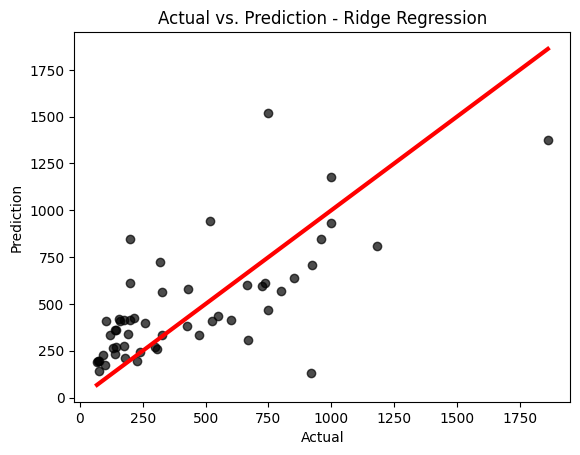

In [71]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_ridge, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Ridge Regression')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### LASSO Regression 

In [72]:
#Implement LASSO regression - model 5
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1) #lambda = 0.1 (regularization hyperparameter)
model_5 = lasso_reg.fit(X_train_scaled, trans_y_train)

In [73]:
model_5.coef_

array([ 0.        ,  0.        ,  0.19470196,  0.        ,  0.        ,
        0.00789374,  0.05731793,  0.        ,  0.        ,  0.31966269,
        0.        ,  0.15529762,  0.        ,  0.        ,  0.01024859,
        0.        , -0.        ,  0.        , -0.0264561 ,  0.        ])

In [74]:
#K-fold cross validation to choose the best model

cv_errors = np.zeros(shape = len(lambda_grid)) #to save cv results

for i in range(len(lambda_grid)):
    lasso_reg = Lasso(alpha = lambda_grid[i])
    scores = cross_val_score(estimator = lasso_reg, 
                             X = X_train_scaled, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

cv_errors

array([-1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -1.00582556, -1.00582556,
       -1.00582556, -1.00582556, -1.00582556, -0.9812174 , -0.93299932,
       -0.89447052, -0.86361975, -0.83011342, -0.80127804, -0.77874506,
       -0.76132785, -0.74784518, -0.7375798 , -0.72977891, -0.72396994,
       -0.71893793, -0.71405621, -0.71003298, -0.70656697, -0.70

In [75]:
#Best lambda
best_lamda = lambda_grid[np.argmax(cv_errors)]
best_lamda

0.016297508346206434

In [76]:
#Best model coefs:
lasso_reg = Lasso(alpha = best_lamda)
model_5 = lasso_reg.fit(X_train_scaled, trans_y_train)
model_5.coef_

array([ 0.        , -0.        ,  0.25319058,  0.03503448,  0.        ,
        0.        ,  0.08917189,  0.14132248,  0.        ,  0.25574493,
        0.        ,  0.13291646,  0.        , -0.        ,  0.06532454,
        0.        , -0.        ,  0.04833639, -0.10326973,  0.        ])

In [77]:
#Predict on test - model 5
pred_lasso = model_5.predict(X_test_scaled)
pred_lasso = pd.Series(boxcox.inverse_transform(pred_lasso.reshape(-1, 1)).reshape(-1), index = test.index)
pred_lasso

295     123.733495
132     578.371170
137     620.270883
268     354.254454
239     260.229793
128     611.541319
189     782.094516
209     442.554893
276     424.770639
236    1650.236143
227     412.018362
320     827.671622
215     402.733720
178    1019.201341
121     836.442576
265     232.766500
45      264.806643
274     592.959367
40      193.863777
244     406.311982
198     273.933234
303     360.833154
7       173.565242
78      336.149101
96     1326.228330
68      424.987495
223     247.425694
35      694.531118
93      364.148675
130     457.873577
311     380.211666
6       187.470309
131     269.022090
63      193.244581
205     225.194667
89      318.733557
293     706.506112
314     329.403876
8       200.264597
10      890.909659
88      391.488169
85      414.031840
124     646.897640
185     614.867666
262     330.912070
43      205.281273
162     149.399541
214     297.480364
301     419.953624
70      700.661275
226     285.304997
271    1235.316847
195     544.

In [78]:
#Absolute error
abs_err_lasso = abs(test['Salary'] - pred_lasso)

#Absolute error mean, median, sd, IQR, max, min
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'Mean of AbsErrors':    abs_err_lasso.mean(),
                                       'Median of AbsErrors' : abs_err_lasso.median(),
                                       'SD of AbsErrors' :     abs_err_lasso.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_lasso),
                                       'Min of AbsErrors':     abs_err_lasso.min(),
                                       'Max of AbsErrors':     abs_err_lasso.max()}, 
                                      index = ['LM_LASSO'])])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-Test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
LM_FWD,220.621618,143.523291,256.415035,156.268159,2.049241,1584.747925
LM_BWD,223.247003,142.297348,275.554457,207.765645,2.341462,1684.495251
LM_Ridge,206.457579,149.031486,172.393610,126.667641,4.987253,787.003670
LM_LASSO,209.529458,155.468882,183.269987,147.629282,7.425694,900.236143


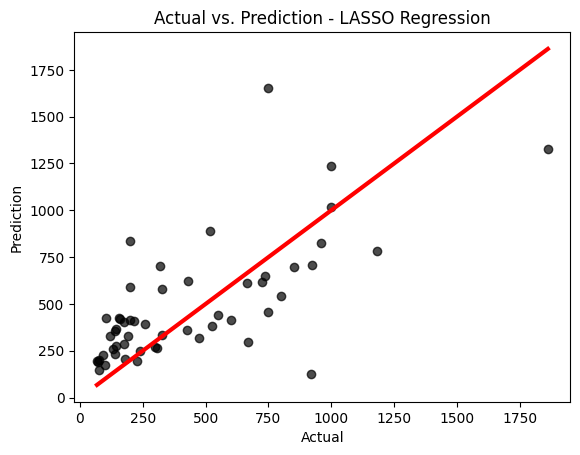

In [79]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_lasso, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LASSO Regression')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()